In [7]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import os
from IPython.display import Audio

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

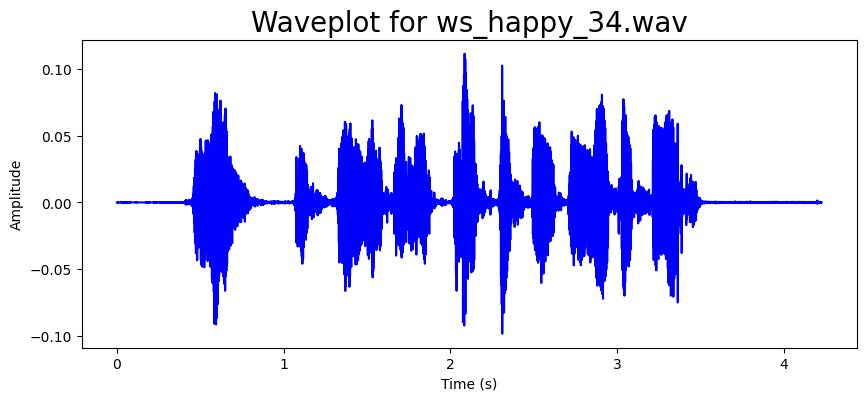

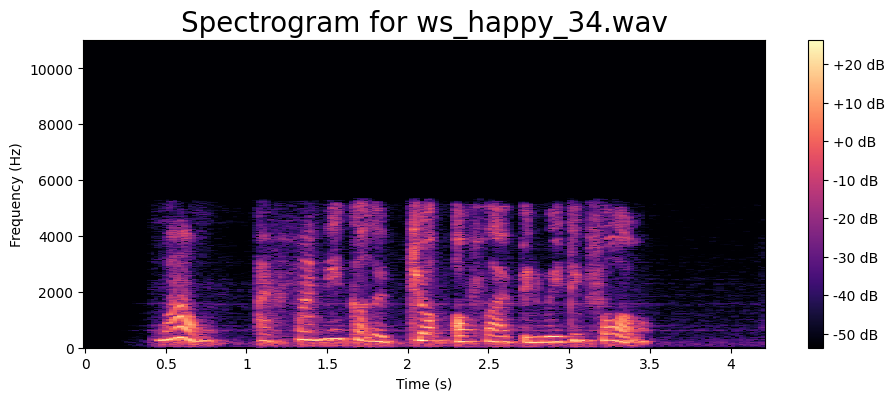

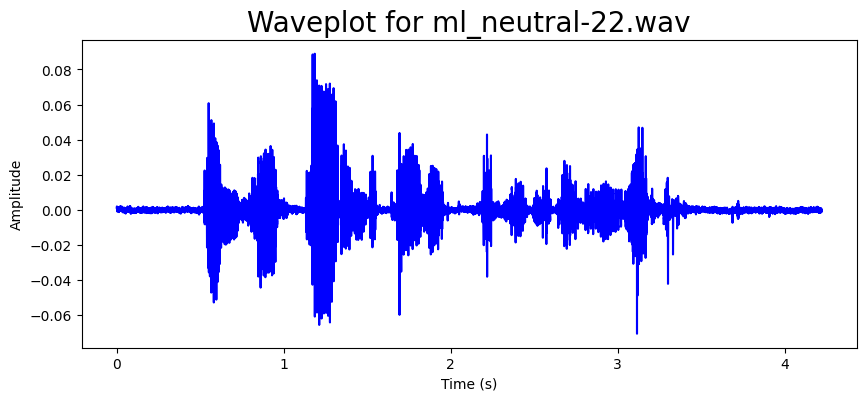

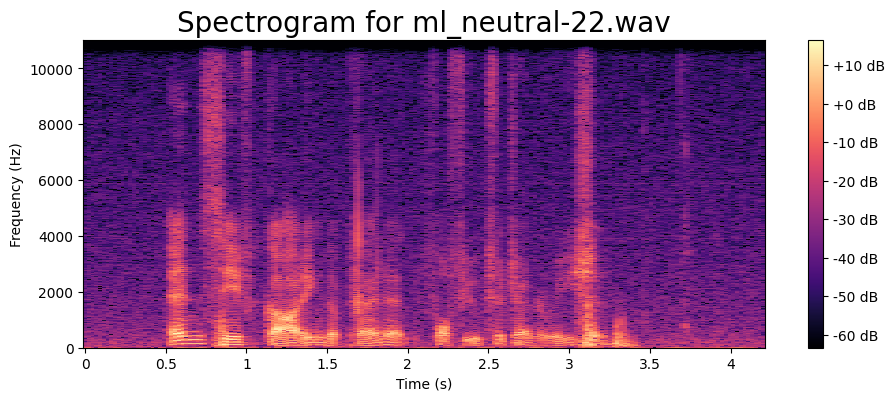

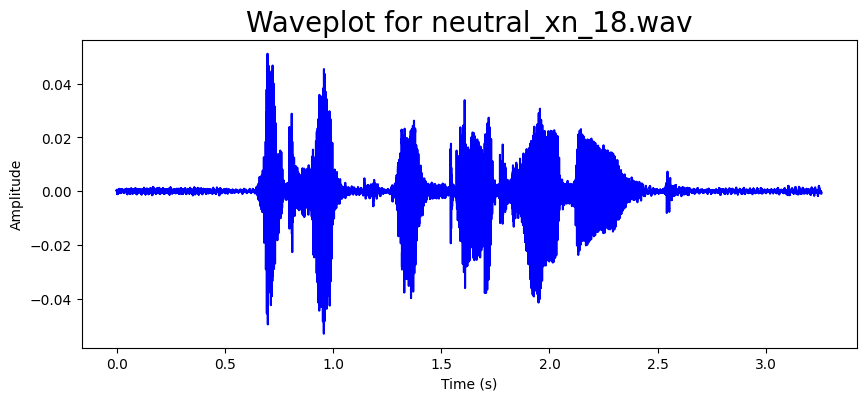

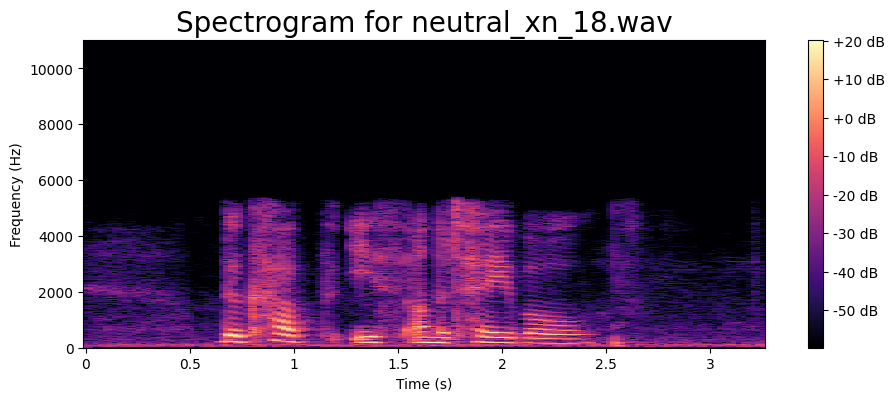

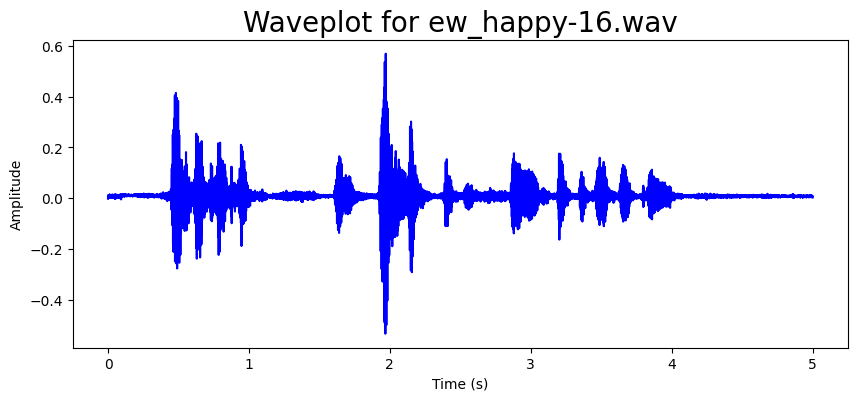

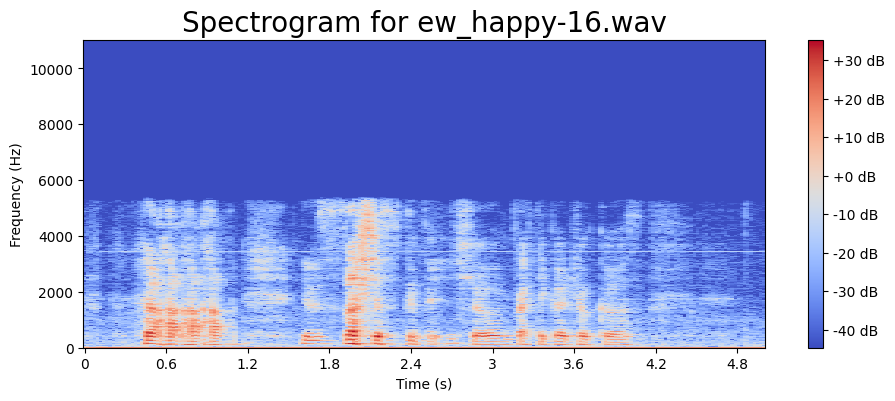

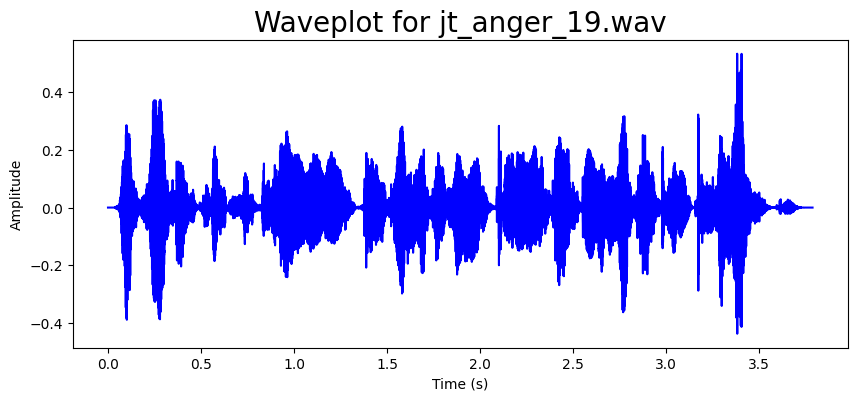

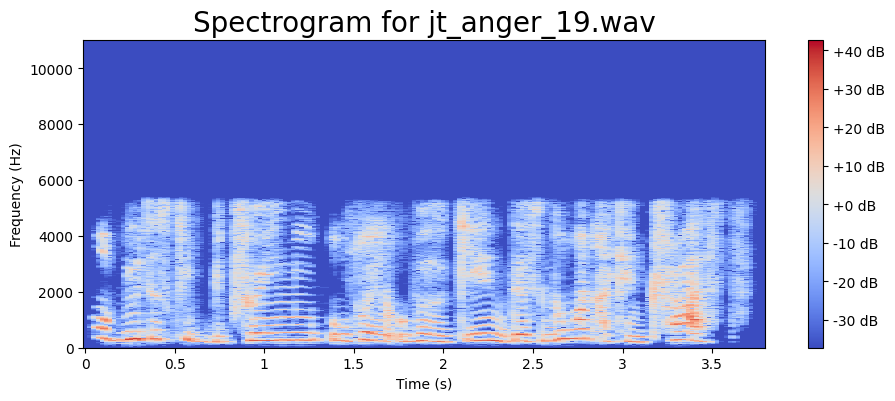

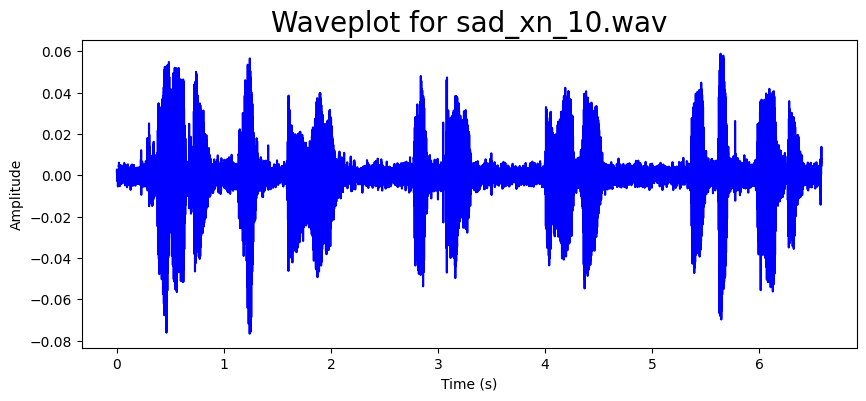

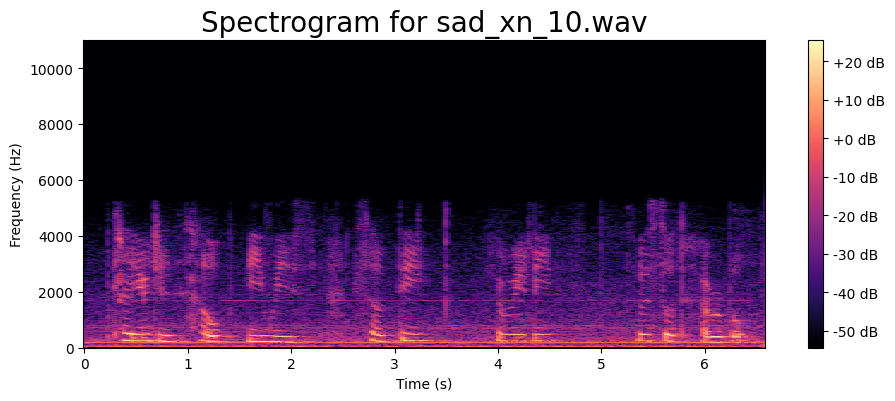

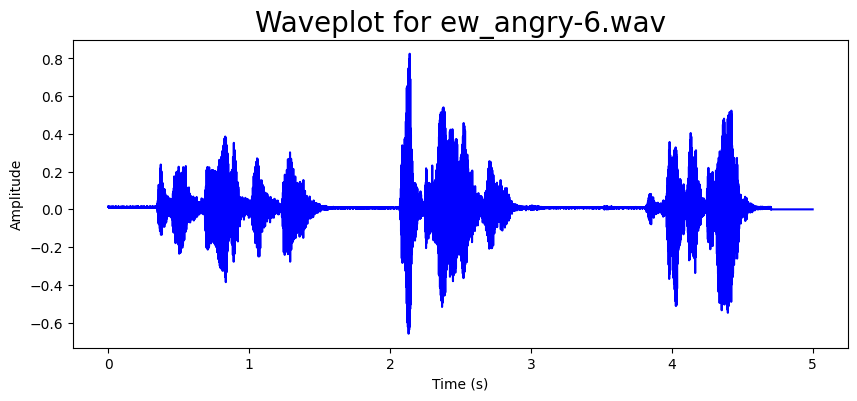

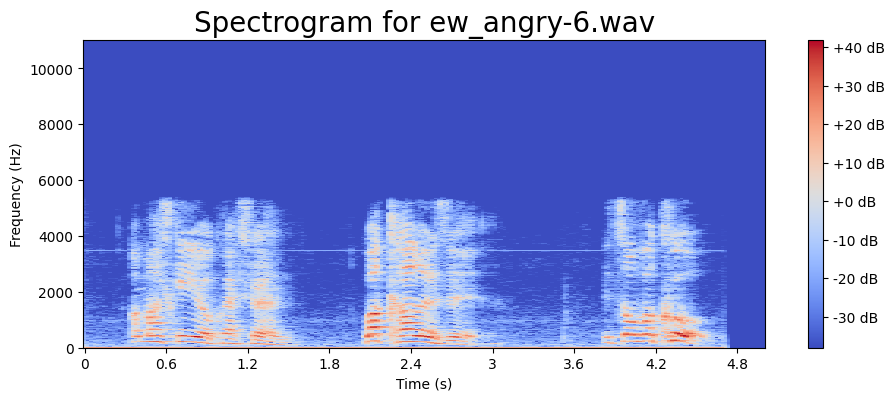

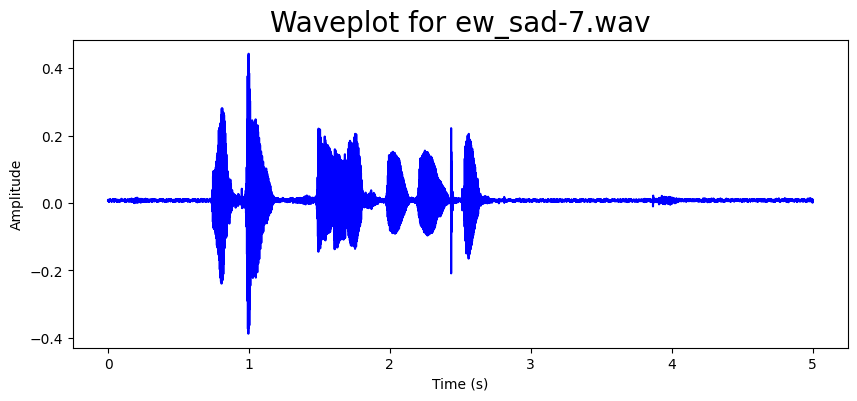

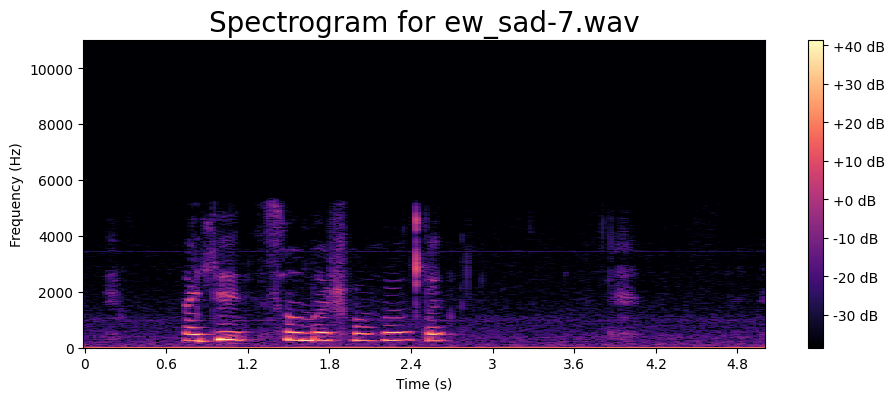

In [27]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f'Waveplot for {emotion}', size=20)
    plt.plot(np.linspace(0, len(data) / sr, num=len(data)), data, color="blue")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(f'Spectrogram for {emotion}', size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

    
# Assuming 'directory' is your folder path with the audio files
def process_audio_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            data, sr = librosa.load(file_path)

            # Here we infer the emotion from the filename, this may need to be adapted
            emotion = filename.split('.csv')[0]

            # Call the plotting functions
            waveplot(data, sr, emotion)
            spectrogram(data, sr, emotion)

audio_files_directory = '/Users/auroraxu/Desktop/IS4242/IS4242 Proj/Presentation Samples'
process_audio_files(audio_files_directory)


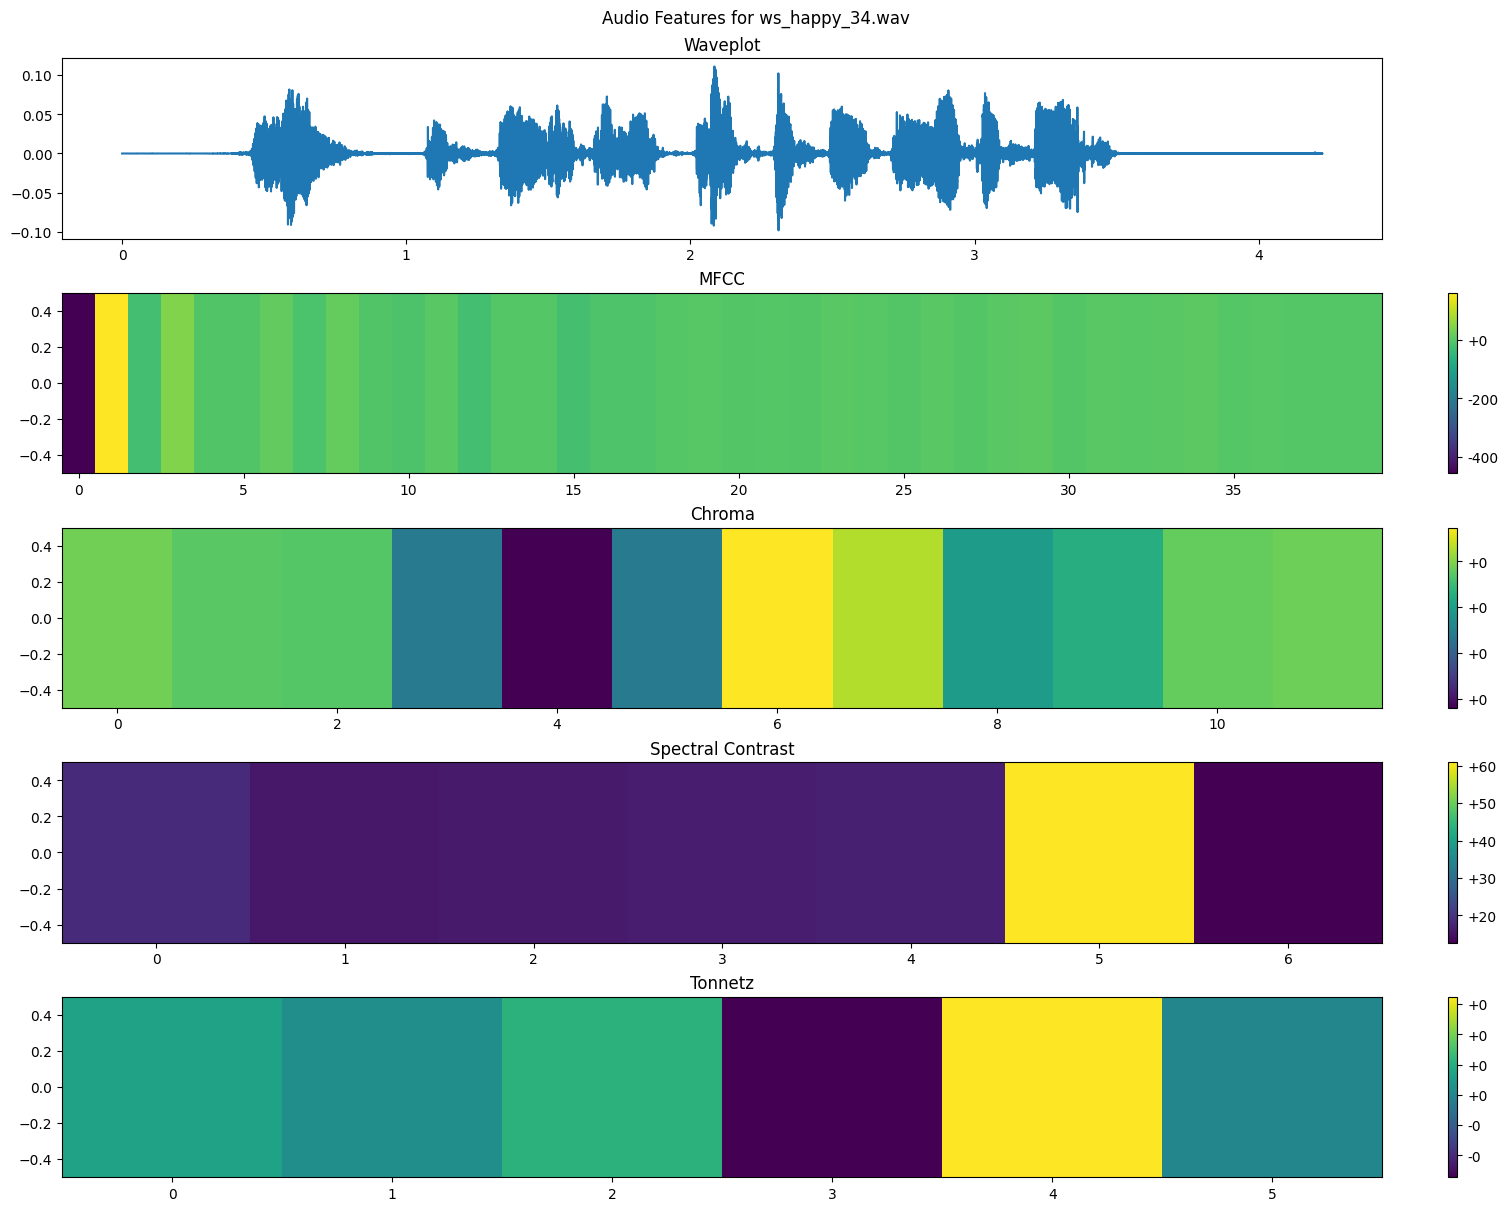

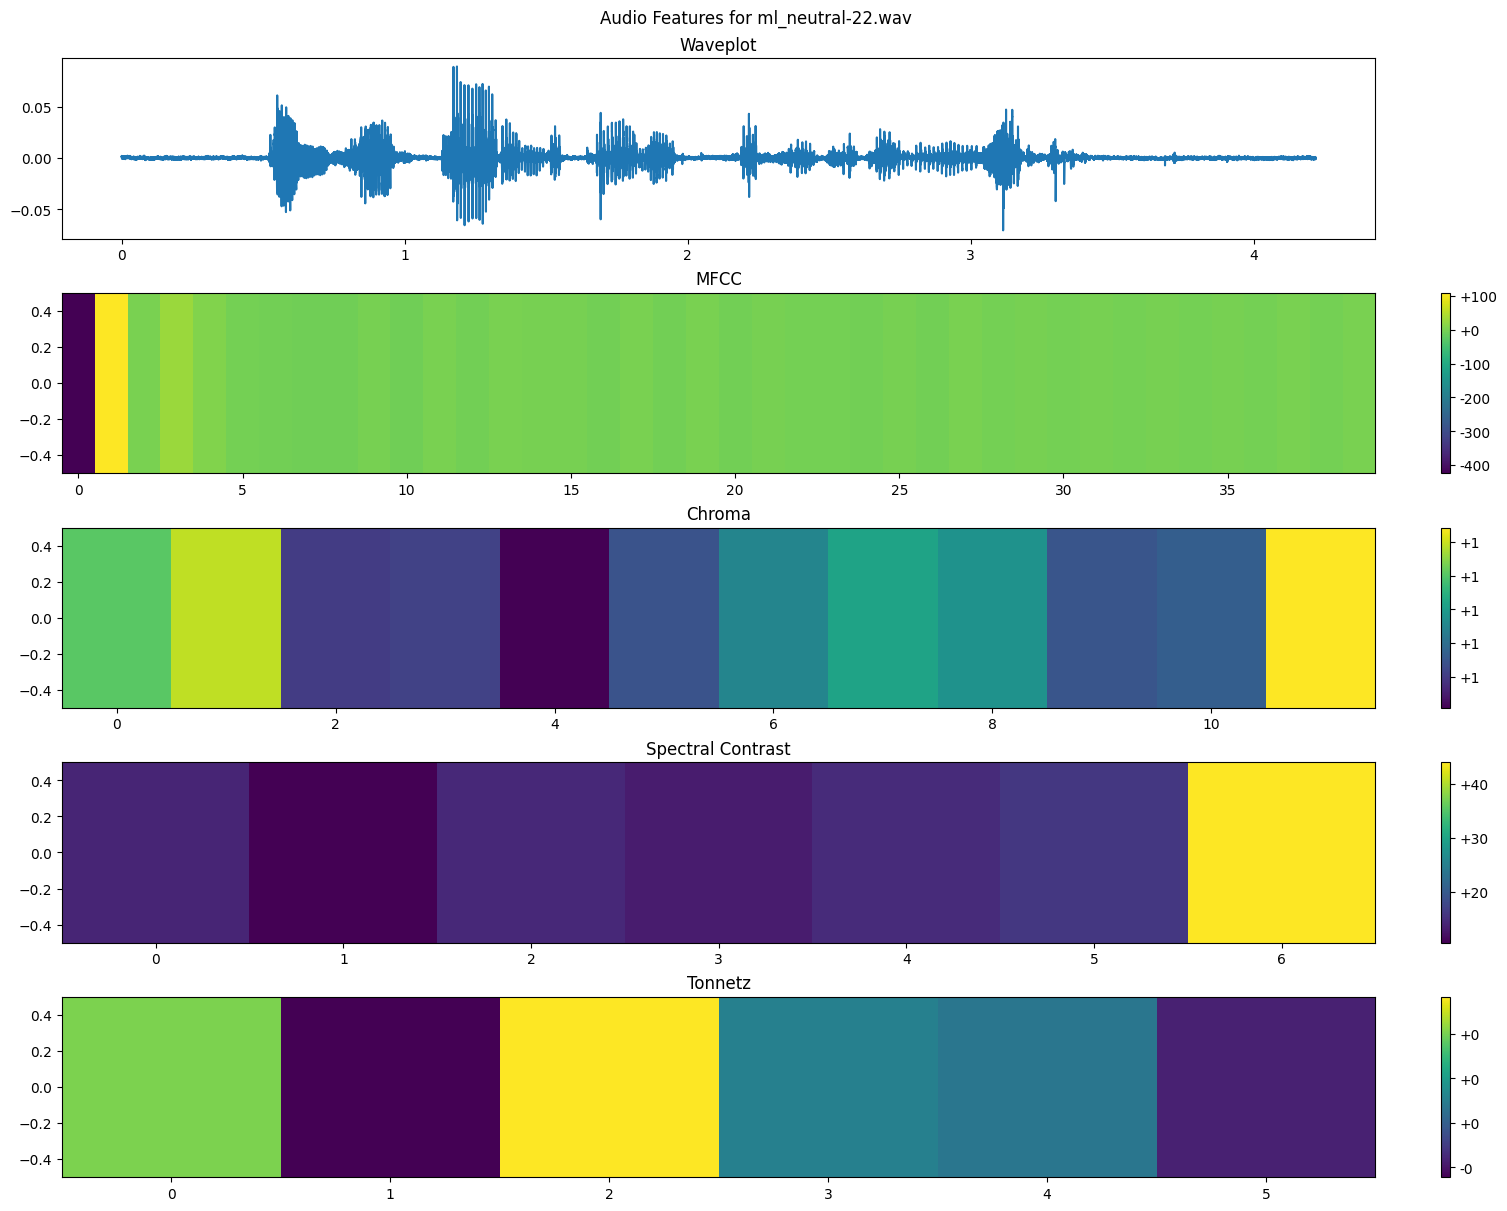

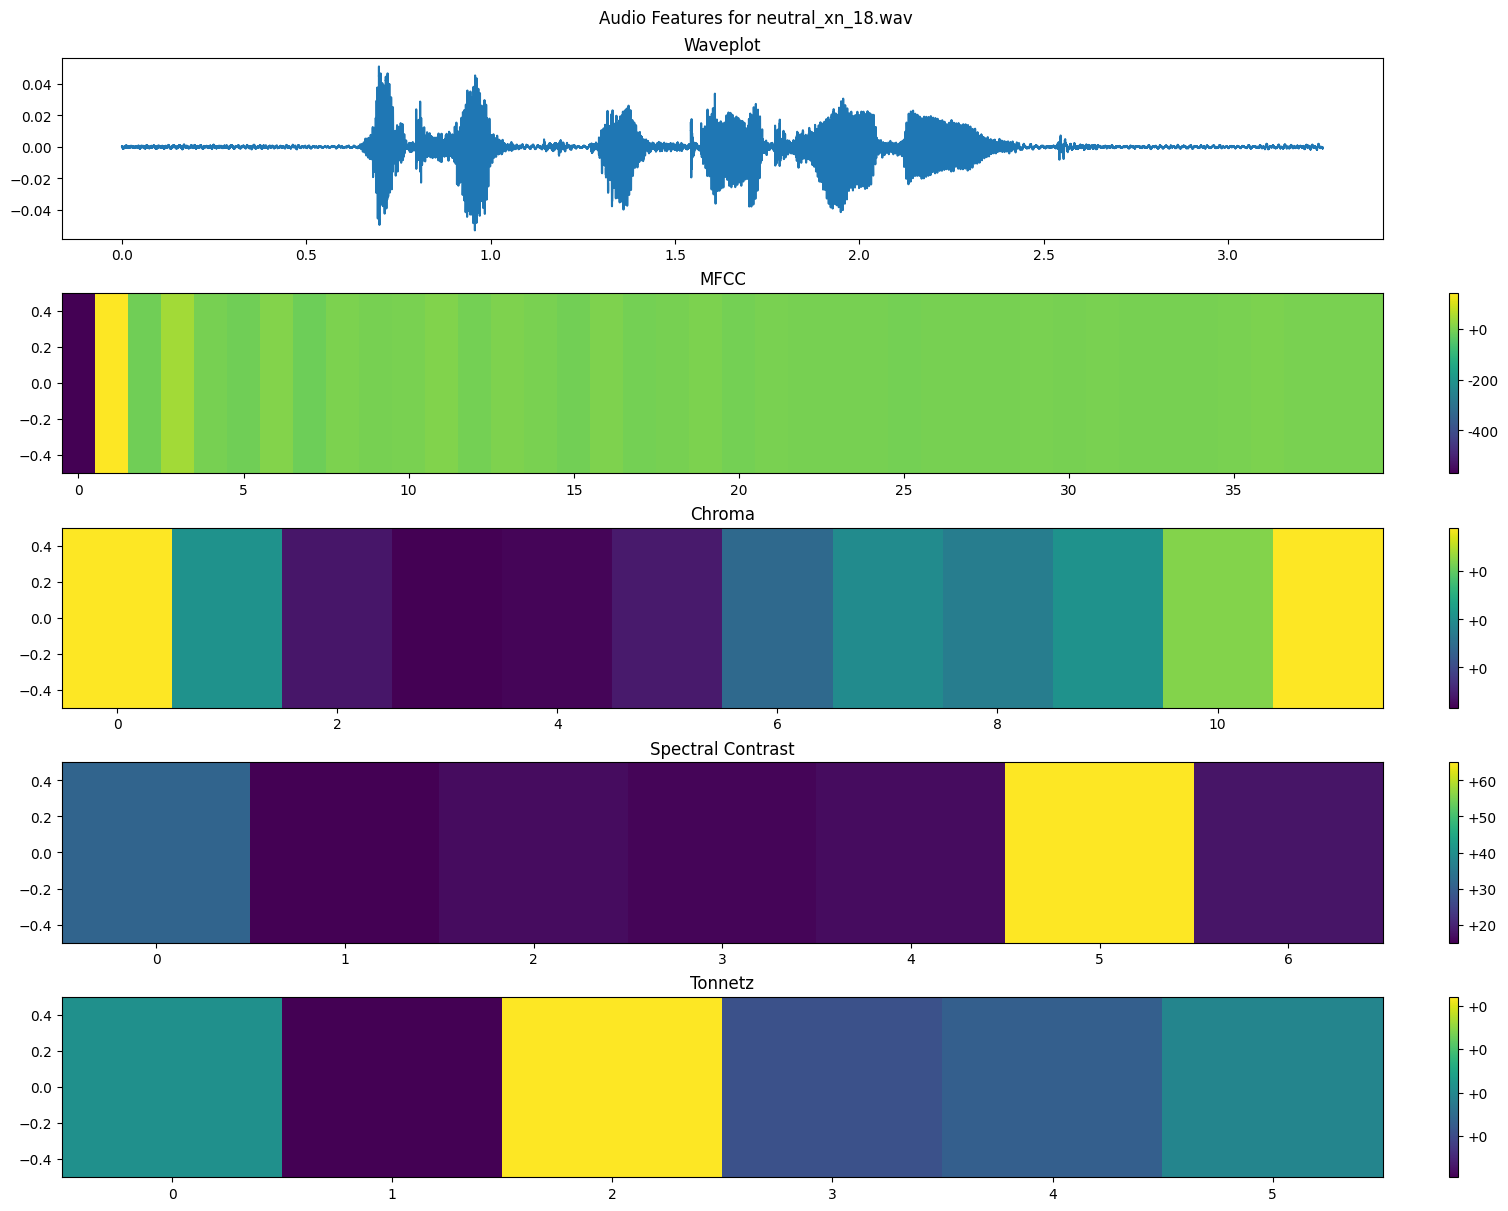

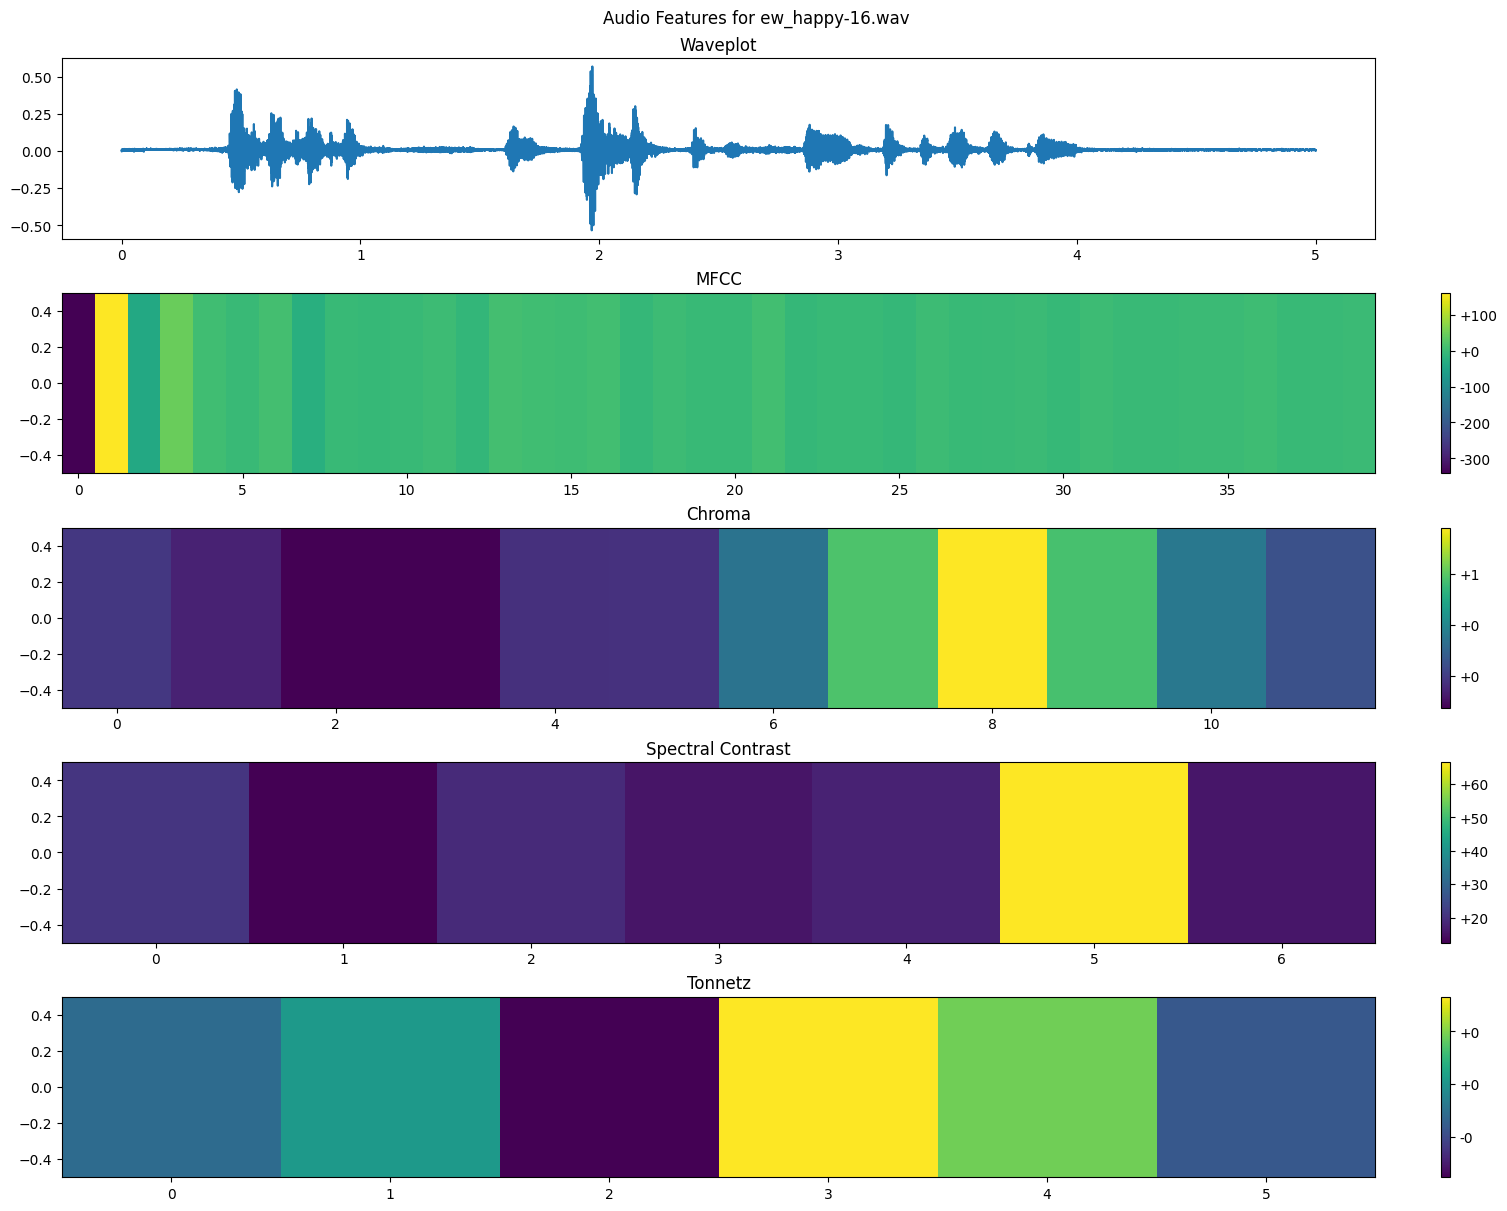

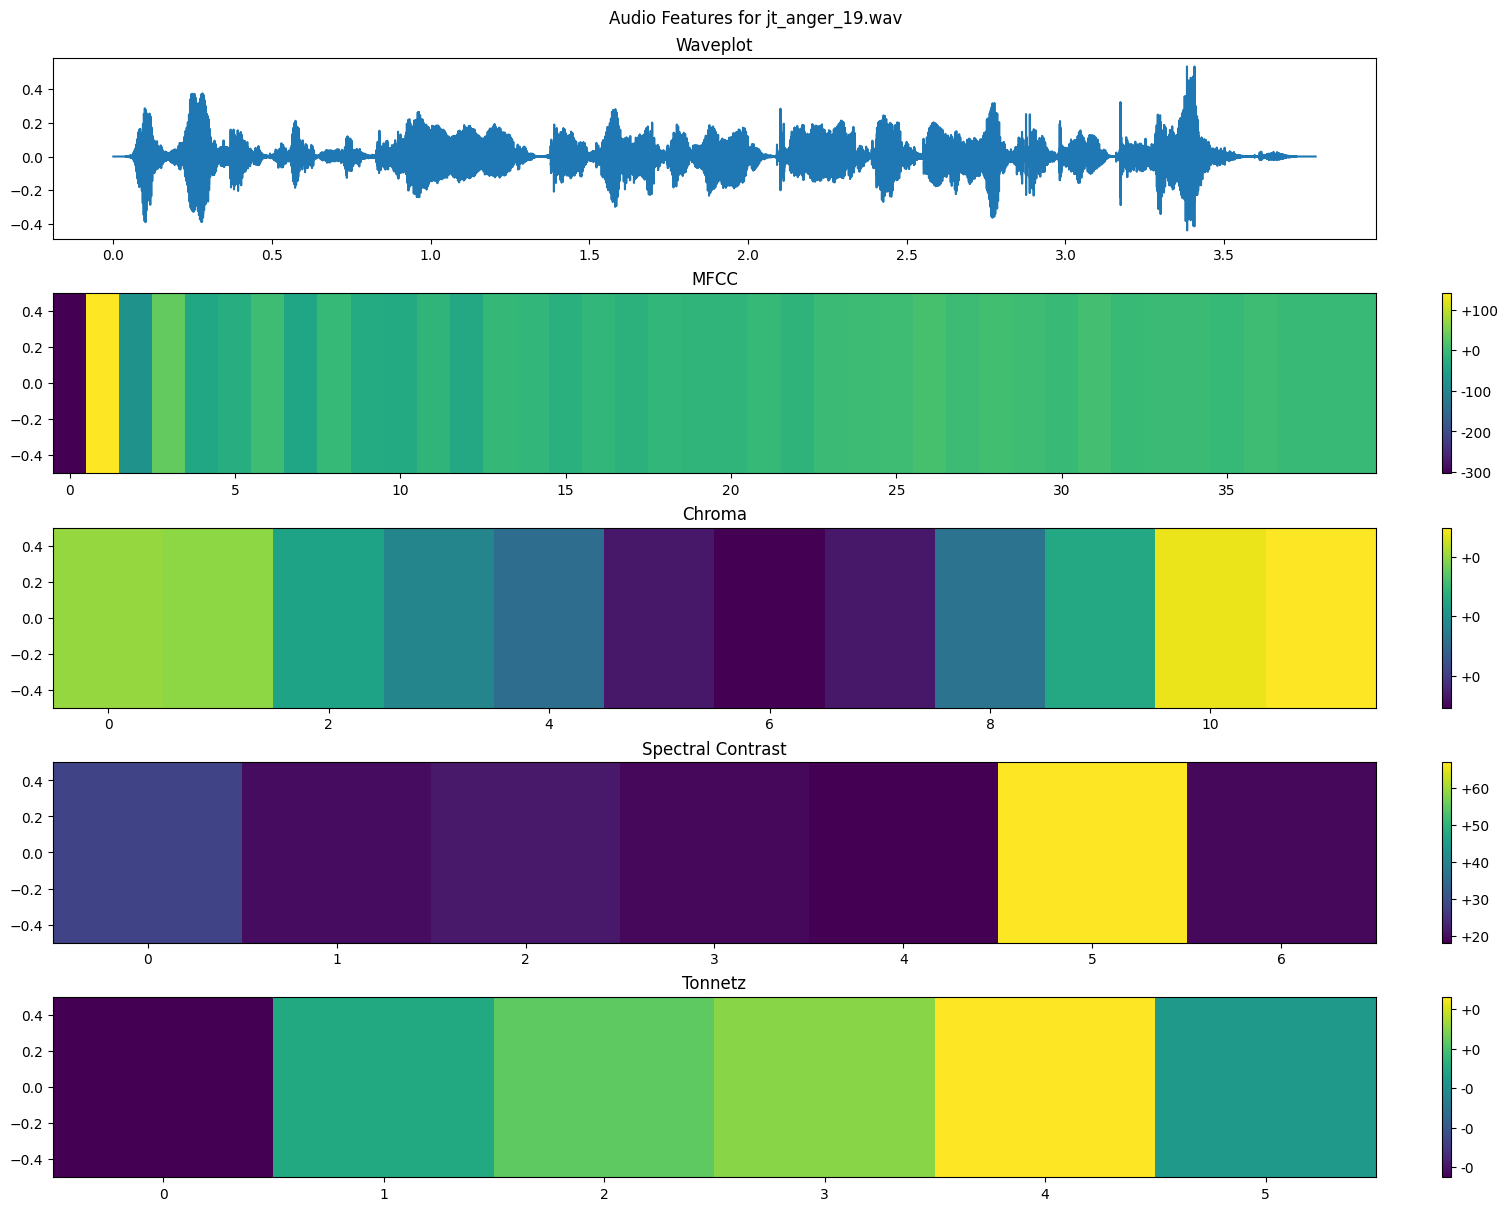

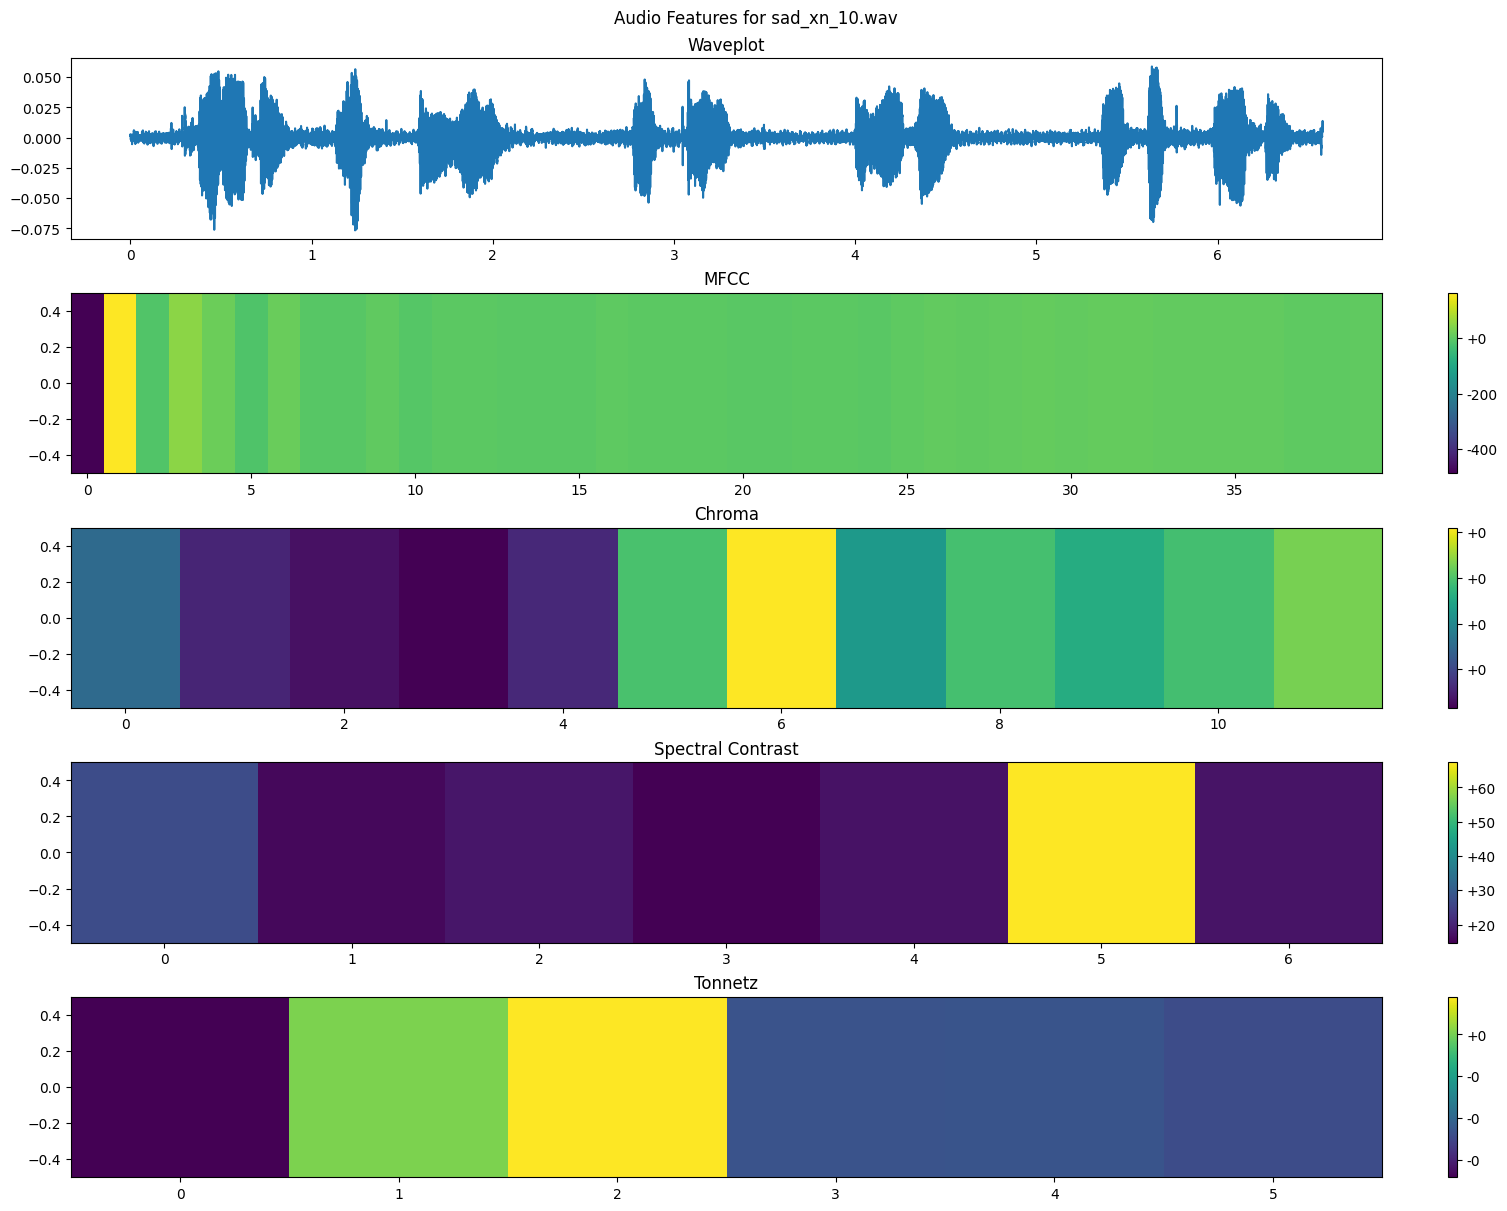

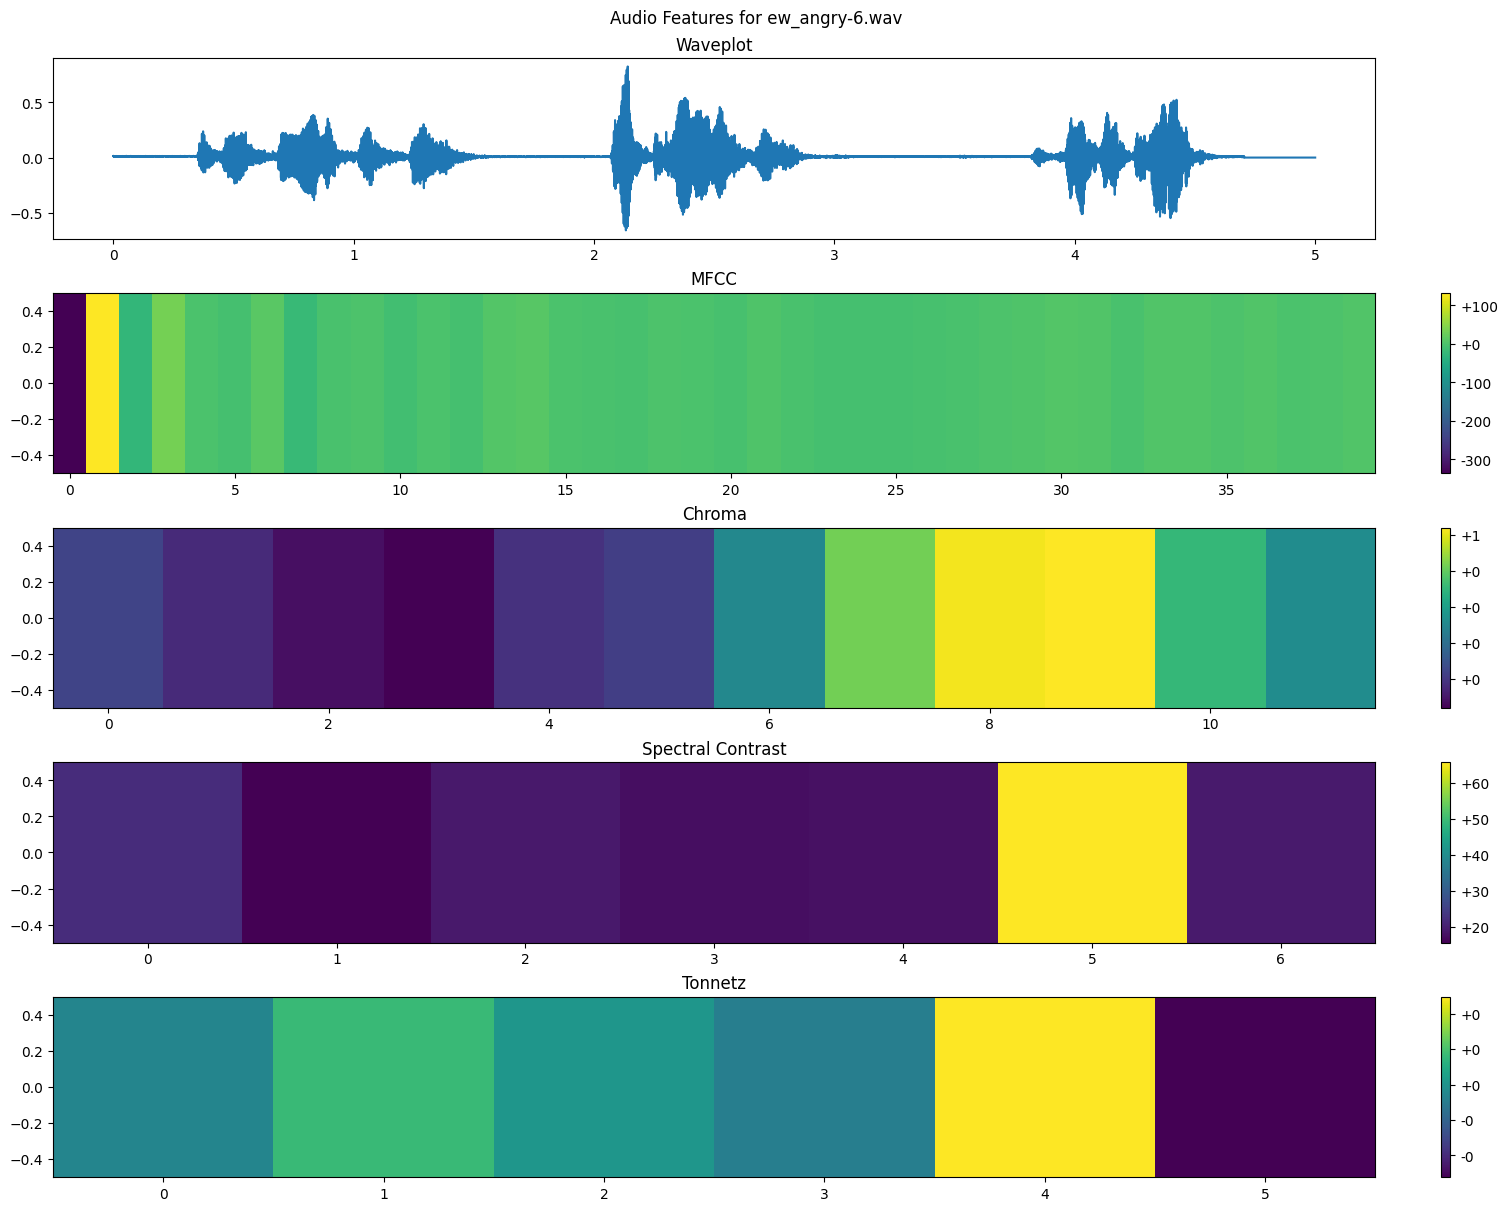

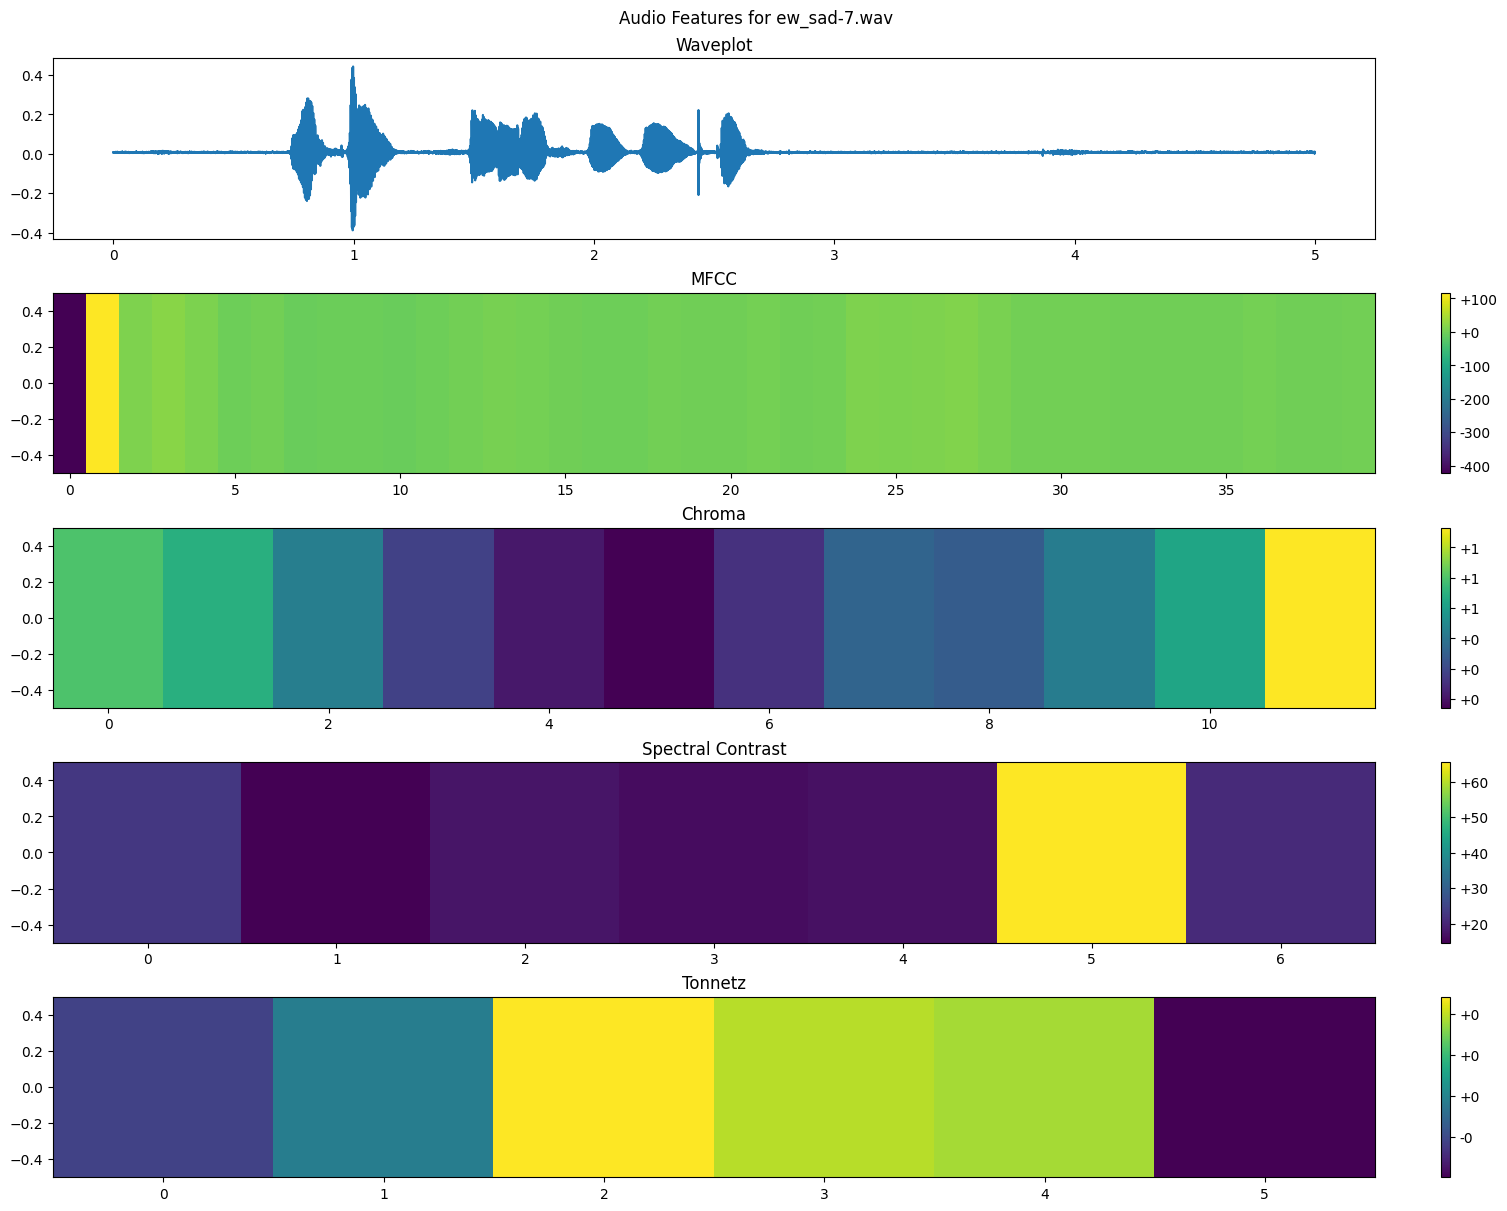

In [24]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define the feature extraction functions here
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    # print(mfcc)
    return mfcc

def extract_chroma(filename):
    y, sr = librosa.load(filename)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    return chroma

def extract_spectral_contrast(filename):
    y, sr = librosa.load(filename)
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)
    return contrast

def extract_tonnetz(filename):
    y, sr = librosa.load(filename)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)
    return tonnetz


# Function to process all .wav files and plot features, including waveplot
def process_and_plot_features(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)

            # Load audio file
            y, sr = librosa.load(file_path)

            # Extract features
            mfccs = extract_mfcc(file_path)
            chroma = extract_chroma(file_path)
            contrast = extract_spectral_contrast(file_path)
            tonnetz = extract_tonnetz(file_path)

            # Plot features and waveplot
            fig, axs = plt.subplots(5, 1, figsize=(15, 12), constrained_layout=True)

            # Waveplot
            # Replace the old waveplot call with the following:
            axs[0].plot(np.linspace(0, len(y) / sr, num=len(y)), y)
            axs[0].set_title('Waveplot')

            # MFCCs
            img_mfccs = axs[1].imshow(np.atleast_2d(mfccs), aspect='auto', origin='lower', cmap='viridis')
            axs[1].set_title('MFCC')
            fig.colorbar(img_mfccs, ax=axs[1], format="%+2.f")

            # Chroma
            img_chroma = axs[2].imshow(np.atleast_2d(chroma), aspect='auto', origin='lower', cmap='viridis')
            axs[2].set_title('Chroma')
            fig.colorbar(img_chroma, ax=axs[2], format="%+2.f")

            # Spectral Contrast
            img_contrast = axs[3].imshow(np.atleast_2d(contrast), aspect='auto', origin='lower', cmap='viridis')
            axs[3].set_title('Spectral Contrast')
            fig.colorbar(img_contrast, ax=axs[3], format="%+2.f")

            # Tonnetz
            img_tonnetz = axs[4].imshow(np.atleast_2d(tonnetz), aspect='auto', origin='lower', cmap='viridis')
            axs[4].set_title('Tonnetz')
            fig.colorbar(img_tonnetz, ax=axs[4], format="%+2.f")

            plt.suptitle(f"Audio Features for {filename}")
            plt.show()

# Use the full path to the folder containing the audio files
audio_files_directory = '/Users/auroraxu/Desktop/IS4242/IS4242 Proj/Presentation Samples'
process_and_plot_features(audio_files_directory)

